In [1]:
import pandas as pd
import numpy as np

# 1. Загрузка датасета

In [2]:
df = pd.read_csv('/kaggle/input/salary/vprod_train/TRAIN_SAL.csv', low_memory=False)
df

,id,academic_degree,accommodation_capability,accommodation_type,additional_premium,additional_requirements,bonus_type,measure_type,busy_type,career_perspective,...,federalDistrictCode,industryBranchName,contactList,company_name,full_company_name,company_inn,company,languageKnowledge,hardSkills,softSkills
0,4e2f52d2-fd76-11e4-8a5b-3bdbd1a6e39d,NaN,False,NaN,NaN,"<p>Доплаты молодым специалистам, возможность с...",NaN,NaN,Полная занятость,False,...,2.0,NaN,NaN,NaN,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОЛОГОДСК...,3.528053e+09,"{""companycode"":""1023501241390"",""email"":""admin@...",[],[],[]
1,fafe2e23-0e2c-11e5-9cc4-3bdbd1a6e39d,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,...,2.0,NaN,NaN,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МЕДИ...",4.714024e+09,"{""companycode"":""1104714000115"",""email"":""llm289...",[],[],[]
2,7eb9edc1-fd76-11e4-8a5b-3bdbd1a6e39d,NaN,False,NaN,NaN,"<p>&nbsp;</p> <p>Фельдшер отделения СМП, Ковжи...",NaN,NaN,Полная занятость,False,...,2.0,NaN,NaN,NaN,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОЛОГОДСК...,3.508001e+09,"{""companycode"":""1023502092360"",""email"":""vtsrb....",[],[],[]
3,2e68ddc3-0499-11e5-b3df-3bdbd1a6e39d,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,...,1.0,NaN,NaN,NaN,БЮДЖЕТНОЕ ПРОФЕССИОНАЛЬНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧР...,3.604006e+09,"{""companycode"":""7df86000-b265-11e7-8d40-736ab1...",[],[],[]
4,8460a3b2-fd7e-11e4-8a5b-3bdbd1a6e39d,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,...,1.0,NaN,NaN,NaN,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОРОНЕЖСК...,3.652003e+09,"{""companycode"":""1023601511196"",""email"":""mail@t...",[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631112,cd727588-391d-11ef-974d-d549be31d974,NaN,False,NaN,NaN,<p><strong>Мы ценим наших сотрудников и гарант...,NaN,NaN,Полная занятость,False,...,1.0,NaN,NaN,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛУКО...",7.701286e+09,"{""companycode"":""1027700000679"",""email"":""luknef...",[],[],[]
631113,d9c5fa08-391d-11ef-bcaf-632315a70518,NaN,False,NaN,NaN,NaN,NaN,NaN,Сезонная,False,...,3.0,NaN,NaN,NaN,"ОТКРЫТОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""САХАРНЫЙ ЗАВОД ...",2.341007e+09,"{""companycode"":""1022304292581"",""email"":""s.pono...",[],[],[]
631114,e1ff8978-391d-11ef-98b6-e73e8fa159bf,NaN,False,NaN,NaN,<p>Возможность работы в порядке внешнего&nbsp;...,NaN,NaN,Частичная занятость,False,...,1.0,NaN,NaN,NaN,ОБЛАСТНОЕ БЮДЖЕТНОЕ ПРОФЕССИОНАЛЬНОЕ ОБРАЗОВАТ...,4.633002e+09,"{""companycode"":""1024601218289"",""email"":""zh_art...",[],[],[]
631115,e58be488-391d-11ef-8f5c-e7d0d2cf29b1,NaN,False,NaN,NaN,<p>Ответственность</p>,NaN,NaN,Полная занятость,False,...,4.0,NaN,NaN,NaN,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,1.215207e+09,"{""companycode"":""1161215050480"",""email"":""uoa-te...",[],[],[]


In [3]:
import missingno as msno

# 2. Первичная предобработка данных

# 2.1 Исследование признакового пространства

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631117 entries, 0 to 631116
Data columns (total 78 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               631117 non-null  object 
 1   academic_degree                  287 non-null     object 
 2   accommodation_capability         631117 non-null  bool   
 3   accommodation_type               33279 non-null   object 
 4   additional_premium               81130 non-null   float64
 5   additional_requirements          230287 non-null  object 
 6   bonus_type                       81636 non-null   object 
 7   measure_type                     81339 non-null   object 
 8   busy_type                        631117 non-null  object 
 9   career_perspective               631117 non-null  bool   
 10  change_time                      626116 non-null  object 
 11  code_external_system             75701 non-null   object 
 12  co

In [5]:
useless_column_id = [0, 12, 14, 15, 17, 49, 50, 57, 58, 59, 60, 72, 73, 74]
problems = [42, 75, 76, 77]

In [6]:
df.columns[useless_column_id]

Index(['id', 'code_profession', 'company_code', 'contact_person', 'data_ids',
       'salary_min', 'salary_max', 'vacancy_address_additional_info',
       'vacancy_address', 'vacancy_address_code', 'vacancy_address_house',
       'full_company_name', 'company_inn', 'company'],
      dtype='object')

In [7]:
df1 = df.drop(columns=df.columns[useless_column_id])
df1

,academic_degree,accommodation_capability,accommodation_type,additional_premium,additional_requirements,bonus_type,measure_type,busy_type,career_perspective,change_time,...,visibility,work_places,professionalSphereName,federalDistrictCode,industryBranchName,contactList,company_name,languageKnowledge,hardSkills,softSkills
0,NaN,False,NaN,NaN,"<p>Доплаты молодым специалистам, возможность с...",NaN,NaN,Полная занятость,False,2024-07-03T10:38:20+0300,...,VISIBLE_TO_ALL,1,Здравоохранение и социальное обеспечение,2.0,NaN,NaN,NaN,[],[],[]
1,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2024-03-12T15:55:59+0300,...,VISIBLE_TO_ALL,1,Здравоохранение и социальное обеспечение,2.0,NaN,NaN,NaN,[],[],[]
2,NaN,False,NaN,NaN,"<p>&nbsp;</p> <p>Фельдшер отделения СМП, Ковжи...",NaN,NaN,Полная занятость,False,2024-04-11T11:52:05+0300,...,VISIBLE_TO_ALL,3,Здравоохранение и социальное обеспечение,2.0,NaN,NaN,NaN,[],[],[]
3,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2024-02-07T16:19:21+0300,...,VISIBLE_TO_ALL,1,Здравоохранение и социальное обеспечение,1.0,NaN,NaN,NaN,[],[],[]
4,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2022-07-31T20:25:37+0300,...,VISIBLE_TO_ALL,1,Здравоохранение и социальное обеспечение,1.0,NaN,NaN,NaN,[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631112,NaN,False,NaN,NaN,<p><strong>Мы ценим наших сотрудников и гарант...,NaN,NaN,Полная занятость,False,2024-07-03T12:22:43+0300,...,VISIBLE_TO_ALL,1,Производство,1.0,NaN,NaN,NaN,[],[],[]
631113,NaN,False,NaN,NaN,NaN,NaN,NaN,Сезонная,False,2024-07-03T12:23:04+0300,...,VISIBLE_TO_ALL,4,Производство,3.0,NaN,NaN,NaN,[],[],[]
631114,NaN,False,NaN,NaN,<p>Возможность работы в порядке внешнего&nbsp;...,NaN,NaN,Частичная занятость,False,2024-07-03T12:23:18+0300,...,VISIBLE_TO_ALL,1,"Образование, наука",1.0,NaN,NaN,NaN,[],[],[]
631115,NaN,False,NaN,NaN,<p>Ответственность</p>,NaN,NaN,Полная занятость,False,2024-07-03T12:23:24+0300,...,VISIBLE_TO_ALL,1,"Работы, не требующие квалификации",4.0,NaN,NaN,NaN,[],[],[]


## 2.2 Работа с агрегатами данных

In [8]:
import re

In [9]:
columns = df.columns
columns[42]

'required_drive_license'

In [10]:
rows = df[columns[42]].apply(lambda x: x.replace('[]', '')).unique()
s = ''.join(rows)
np.unique(list(re.sub(r'[^а-яА-Яa-zA-Z]', '', s)))

array(['A', 'B', 'C', 'D', 'E'], dtype='<U1')

In [11]:
df1['car_A'] = df1[columns[42]].str.contains('A')
df1['car_B'] = df1[columns[42]].str.contains('B')
df1['car_C'] = df1[columns[42]].str.contains('C')
df1['car_D'] = df1[columns[42]].str.contains('D')
df1['car_E'] = df1[columns[42]].str.contains('E')

In [12]:
df2 = df1.drop(columns=columns[42])
df2

,academic_degree,accommodation_capability,accommodation_type,additional_premium,additional_requirements,bonus_type,measure_type,busy_type,career_perspective,change_time,...,contactList,company_name,languageKnowledge,hardSkills,softSkills,car_A,car_B,car_C,car_D,car_E
0,NaN,False,NaN,NaN,"<p>Доплаты молодым специалистам, возможность с...",NaN,NaN,Полная занятость,False,2024-07-03T10:38:20+0300,...,NaN,NaN,[],[],[],False,False,False,False,False
1,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2024-03-12T15:55:59+0300,...,NaN,NaN,[],[],[],False,False,False,False,False
2,NaN,False,NaN,NaN,"<p>&nbsp;</p> <p>Фельдшер отделения СМП, Ковжи...",NaN,NaN,Полная занятость,False,2024-04-11T11:52:05+0300,...,NaN,NaN,[],[],[],False,False,False,False,False
3,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2024-02-07T16:19:21+0300,...,NaN,NaN,[],[],[],False,False,False,False,False
4,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2022-07-31T20:25:37+0300,...,NaN,NaN,[],[],[],False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631112,NaN,False,NaN,NaN,<p><strong>Мы ценим наших сотрудников и гарант...,NaN,NaN,Полная занятость,False,2024-07-03T12:22:43+0300,...,NaN,NaN,[],[],[],False,False,False,False,False
631113,NaN,False,NaN,NaN,NaN,NaN,NaN,Сезонная,False,2024-07-03T12:23:04+0300,...,NaN,NaN,[],[],[],False,False,False,False,False
631114,NaN,False,NaN,NaN,<p>Возможность работы в порядке внешнего&nbsp;...,NaN,NaN,Частичная занятость,False,2024-07-03T12:23:18+0300,...,NaN,NaN,[],[],[],False,False,False,False,False
631115,NaN,False,NaN,NaN,<p>Ответственность</p>,NaN,NaN,Полная занятость,False,2024-07-03T12:23:24+0300,...,NaN,NaN,[],[],[],False,False,False,False,False


In [13]:
import ujson
import itertools

In [14]:
def language_transform(value: str) -> str:
    res = []
    json = ujson.loads(value)
    for data in json:
        code_language = data['code_language']
        level = data.get('level', 'Любой')
        res.append(f'{code_language} - {level}')
    return ', '.join(res)

In [15]:
df3 = df2.copy()
df3['languages'] = df2[columns[75]].apply(language_transform)
df3

,academic_degree,accommodation_capability,accommodation_type,additional_premium,additional_requirements,bonus_type,measure_type,busy_type,career_perspective,change_time,...,company_name,languageKnowledge,hardSkills,softSkills,car_A,car_B,car_C,car_D,car_E,languages
0,NaN,False,NaN,NaN,"<p>Доплаты молодым специалистам, возможность с...",NaN,NaN,Полная занятость,False,2024-07-03T10:38:20+0300,...,NaN,[],[],[],False,False,False,False,False,
1,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2024-03-12T15:55:59+0300,...,NaN,[],[],[],False,False,False,False,False,
2,NaN,False,NaN,NaN,"<p>&nbsp;</p> <p>Фельдшер отделения СМП, Ковжи...",NaN,NaN,Полная занятость,False,2024-04-11T11:52:05+0300,...,NaN,[],[],[],False,False,False,False,False,
3,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2024-02-07T16:19:21+0300,...,NaN,[],[],[],False,False,False,False,False,
4,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2022-07-31T20:25:37+0300,...,NaN,[],[],[],False,False,False,False,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631112,NaN,False,NaN,NaN,<p><strong>Мы ценим наших сотрудников и гарант...,NaN,NaN,Полная занятость,False,2024-07-03T12:22:43+0300,...,NaN,[],[],[],False,False,False,False,False,
631113,NaN,False,NaN,NaN,NaN,NaN,NaN,Сезонная,False,2024-07-03T12:23:04+0300,...,NaN,[],[],[],False,False,False,False,False,
631114,NaN,False,NaN,NaN,<p>Возможность работы в порядке внешнего&nbsp;...,NaN,NaN,Частичная занятость,False,2024-07-03T12:23:18+0300,...,NaN,[],[],[],False,False,False,False,False,
631115,NaN,False,NaN,NaN,<p>Ответственность</p>,NaN,NaN,Полная занятость,False,2024-07-03T12:23:24+0300,...,NaN,[],[],[],False,False,False,False,False,


In [16]:
def skills_transform(value: str, key: str) -> str:
    res = []
    json = ujson.loads(value)
    for data in json:
        res.append(data.get(key, ''))
    return ', '.join(res)

In [17]:
df4 = df3.copy()
df4['hs'] = df3[columns[76]].apply(lambda s: skills_transform(s, 'hard_skill_name'))
df4['ss'] = df3[columns[77]].apply(lambda s: skills_transform(s, 'soft_skill_name'))
df4

,academic_degree,accommodation_capability,accommodation_type,additional_premium,additional_requirements,bonus_type,measure_type,busy_type,career_perspective,change_time,...,hardSkills,softSkills,car_A,car_B,car_C,car_D,car_E,languages,hs,ss
0,NaN,False,NaN,NaN,"<p>Доплаты молодым специалистам, возможность с...",NaN,NaN,Полная занятость,False,2024-07-03T10:38:20+0300,...,[],[],False,False,False,False,False,,,
1,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2024-03-12T15:55:59+0300,...,[],[],False,False,False,False,False,,,
2,NaN,False,NaN,NaN,"<p>&nbsp;</p> <p>Фельдшер отделения СМП, Ковжи...",NaN,NaN,Полная занятость,False,2024-04-11T11:52:05+0300,...,[],[],False,False,False,False,False,,,
3,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2024-02-07T16:19:21+0300,...,[],[],False,False,False,False,False,,,
4,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,2022-07-31T20:25:37+0300,...,[],[],False,False,False,False,False,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631112,NaN,False,NaN,NaN,<p><strong>Мы ценим наших сотрудников и гарант...,NaN,NaN,Полная занятость,False,2024-07-03T12:22:43+0300,...,[],[],False,False,False,False,False,,,
631113,NaN,False,NaN,NaN,NaN,NaN,NaN,Сезонная,False,2024-07-03T12:23:04+0300,...,[],[],False,False,False,False,False,,,
631114,NaN,False,NaN,NaN,<p>Возможность работы в порядке внешнего&nbsp;...,NaN,NaN,Частичная занятость,False,2024-07-03T12:23:18+0300,...,[],[],False,False,False,False,False,,,
631115,NaN,False,NaN,NaN,<p>Ответственность</p>,NaN,NaN,Полная занятость,False,2024-07-03T12:23:24+0300,...,[],[],False,False,False,False,False,,,


In [18]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631117 entries, 0 to 631116
Data columns (total 71 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   academic_degree             287 non-null     object 
 1   accommodation_capability    631117 non-null  bool   
 2   accommodation_type          33279 non-null   object 
 3   additional_premium          81130 non-null   float64
 4   additional_requirements     230287 non-null  object 
 5   bonus_type                  81636 non-null   object 
 6   measure_type                81339 non-null   object 
 7   busy_type                   631117 non-null  object 
 8   career_perspective          631117 non-null  bool   
 9   change_time                 626116 non-null  object 
 10  code_external_system        75701 non-null   object 
 11  code_professional_sphere    631103 non-null  object 
 12  contact_source              63054 non-null   object 
 13  date_create   

In [19]:
df4.drop(columns=['softSkills', 'hardSkills', 'languageKnowledge'], inplace=True)

In [20]:
df4.shape

(631117, 68)

In [21]:
df4.drop_duplicates(inplace=True)

In [22]:
df4.shape

(630776, 68)

<Axes: >

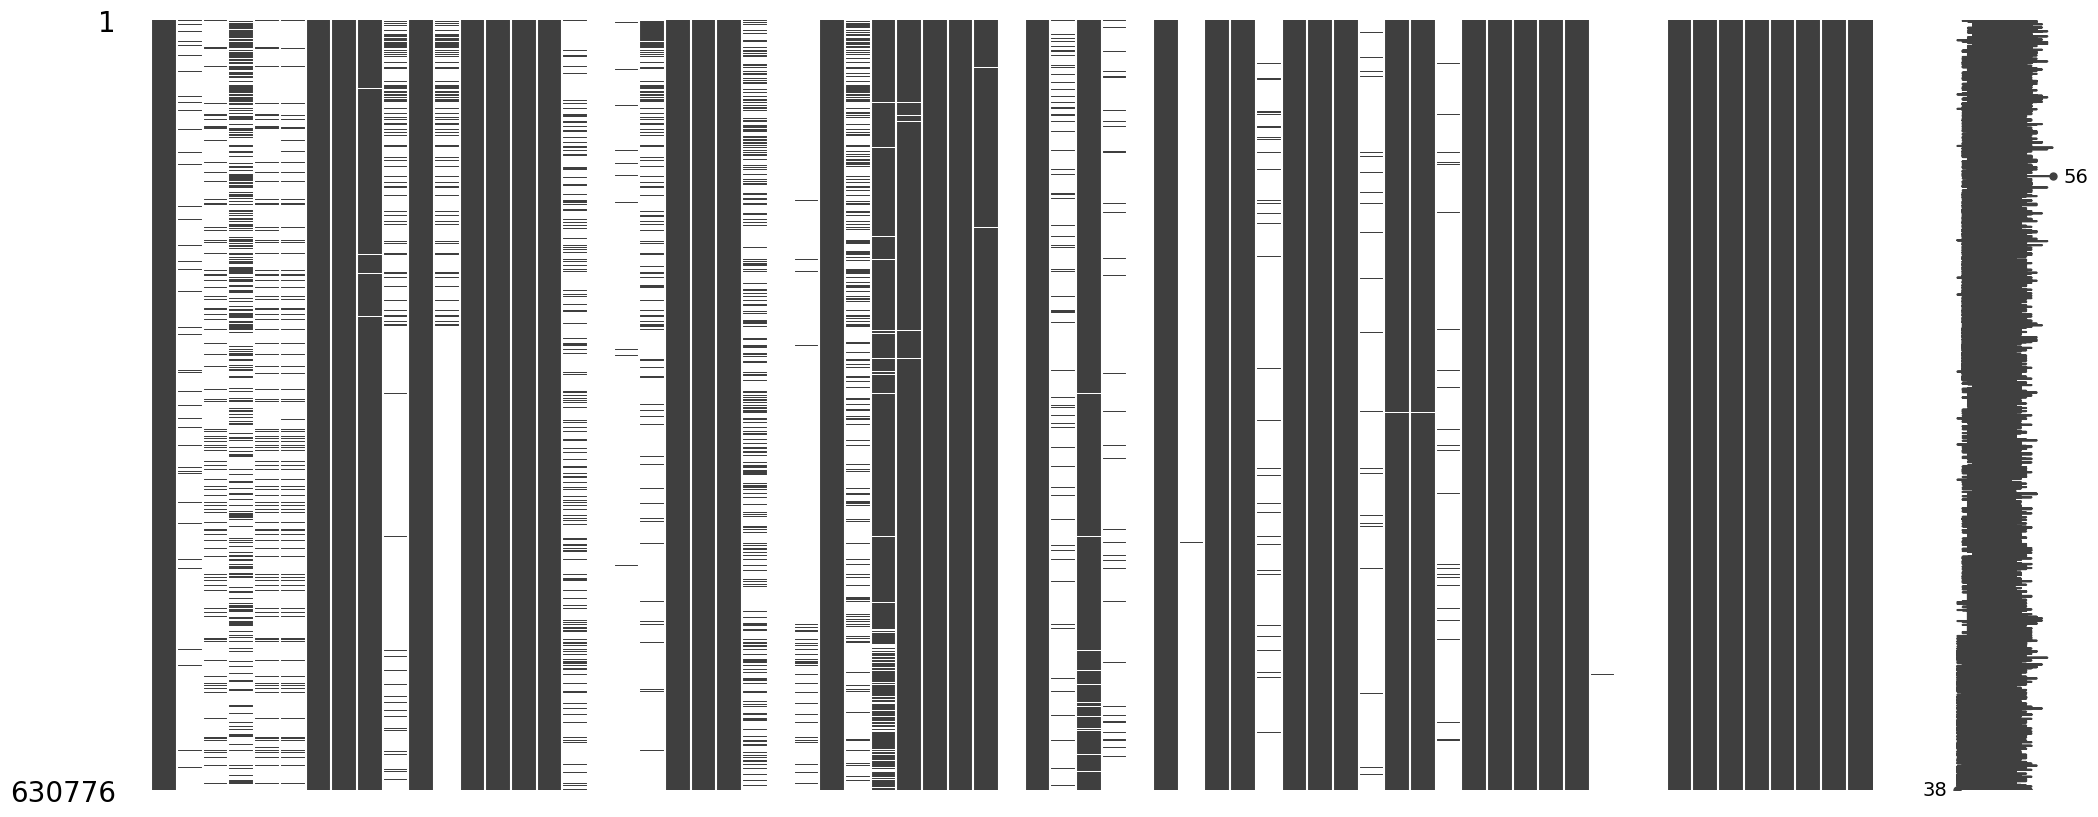

In [23]:
msno.matrix(df4)

In [24]:
columns = df4.columns
columns

Index(['academic_degree', 'accommodation_capability', 'accommodation_type',
       'additional_premium', 'additional_requirements', 'bonus_type',
       'measure_type', 'busy_type', 'career_perspective', 'change_time',
       'code_external_system', 'code_professional_sphere', 'contact_source',
       'date_create', 'date_modify', 'deleted', 'education',
       'education_speciality', 'foreign_workers_capability', 'metro_ids',
       'is_mobility_program', 'is_moderated', 'is_uzbekistan_recruitment',
       'is_quoted', 'need_medcard', 'oknpo_code', 'okso_code',
       'original_source_type', 'other_vacancy_benefit',
       'position_requirements', 'position_responsibilities',
       'publication_period', 'published_date', 'regionName', 'regionNameTerm',
       'company_business_size', 'required_certificates', 'required_experience',
       'retraining_capability', 'retraining_condition', 'retraining_grant',
       'retraining_grant_value', 'salary', 'schedule_type',
       'social_prot

In [25]:
df4.drop(columns=['academic_degree', 'accommodation_type', 'additional_premium', 
                  'bonus_type', 'measure_type', 'career_perspective', 'change_time', 
                  'code_external_system', 'contact_source', 'date_create',
                  'date_modify', 'deleted', 'education_speciality', 'foreign_workers_capability', 
                  'metro_ids', 'is_mobility_program', 'is_moderated', 'is_uzbekistan_recruitment', 
                  'is_quoted', 'oknpo_code', 'okso_code', 'original_source_type', 'publication_period',
                  'published_date', 'regionNameTerm', 'required_certificates', 'retraining_capability',
                  'retraining_condition', 'retraining_grant', 'retraining_grant_value', 'social_protected_ids',
                  'source_type', 'state_region_code', 'status', 'transport_compensation', 'visibility',
                  'contactList', 'company_name'], inplace=True)

In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630776 entries, 0 to 631116
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   accommodation_capability   630776 non-null  bool   
 1   additional_requirements    230287 non-null  object 
 2   busy_type                  630776 non-null  object 
 3   code_professional_sphere   630762 non-null  object 
 4   education                  630776 non-null  object 
 5   need_medcard               182080 non-null  object 
 6   other_vacancy_benefit      144409 non-null  object 
 7   position_requirements      590079 non-null  object 
 8   position_responsibilities  626865 non-null  object 
 9   regionName                 627042 non-null  object 
 10  company_business_size      630776 non-null  object 
 11  required_experience        619567 non-null  float64
 12  salary                     630776 non-null  int64  
 13  schedule_type              630776 

In [29]:
df4.to_csv('dropped_sal.csv', index=False, encoding='utf-8')

In [30]:
df4 = pd.read_csv('/kaggle/working/dropped_sal.csv', low_memory=False)

In [27]:
df4

,accommodation_capability,additional_requirements,busy_type,code_professional_sphere,education,need_medcard,other_vacancy_benefit,position_requirements,position_responsibilities,regionName,...,federalDistrictCode,industryBranchName,car_A,car_B,car_C,car_D,car_E,languages,hs,ss
0,False,"<p>Доплаты молодым специалистам, возможность с...",Полная занятость,Medicine,Среднее профессиональное,NaN,"<p>Социальный пакет, ч<span style=""font-family...",<p>Наличие сертификата или аккредитации по спе...,<p>-осуществление сестринского процесса при ух...,Вологодская область,...,2.0,NaN,False,False,False,False,False,,,
1,False,NaN,Полная занятость,Medicine,Среднее профессиональное,NaN,<ul> <li>профессиональное развитие в стабильно...,<ul> <li>среднее специальное медицинское образ...,<ul> <li>подготовка кабинета к приему пациенто...,Ленинградская область,...,2.0,NaN,False,False,False,False,False,,,
2,False,"<p>&nbsp;</p> <p>Фельдшер отделения СМП, Ковжи...",Полная занятость,Medicine,Среднее профессиональное,True,<p>ЗдравохранениеВыплачивается единовременное ...,<p>Опыт работы</p>,Осуществляет оперативное руководство медицинск...,Вологодская область,...,2.0,NaN,False,False,False,False,False,,,
3,False,NaN,Полная занятость,Medicine,Высшее,True,Социальный пакет,ВЫСШЕЕ ПРОФЕССИОНАЛЬНОЕ ОБРАЗОВАНИЕ(ВРАЧ-ПЕДИА...,"<p>ПРЕПОДАВАНИЕ ПЕДИАТРИИ, СОСТАВЛЕНИЕ ПЛАНОВ ...",Воронежская область,...,1.0,NaN,False,False,False,False,False,,,
4,False,NaN,Полная занятость,Medicine,Среднее профессиональное,True,"<p>Обеспечение спецодеждой, льготная пенсия</p>","<p>Среднее профессиональное образование, налич...","<p>ЛЕЧЕБНАЯ, КОНСУЛЬТАЦИОННАЯ, ПРОФИЛАКТИЧЕСКА...",Воронежская область,...,1.0,NaN,False,False,False,False,False,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631112,False,<p><strong>Мы ценим наших сотрудников и гарант...,Полная занятость,Industry,Среднее,NaN,<p>Социальный пакет. График сменности: день / ...,<p>Добросовестное выполнение должностных обяза...,<p><strong>Чем предстоит заниматься:</strong><...,Липецкая область,...,1.0,NaN,False,False,False,False,False,,,
631113,False,NaN,Сезонная,Industry,Не указано,NaN,"<p>предоставление служебного транспорта, льгот...",<p>ответственность</p>,"<p>следить за состоянием утфеля в мешалках, оп...",Краснодарский край,...,3.0,NaN,False,False,False,False,False,,,
631114,False,<p>Возможность работы в порядке внешнего&nbsp;...,Частичная занятость,Education,Высшее,True,NaN,"<p>Высшее педагогическое образование, соответс...",<p>Проведение учебных занятий по учебному пред...,Курская область,...,1.0,NaN,False,False,False,False,False,,,
631115,False,<p>Ответственность</p>,Полная занятость,NotQualification,Не указано,True,Социальный пакет,без предъявления требования к опыту работы и о...,"<p>Основными обязанностями дворника, согласно ...",Республика Марий Эл,...,4.0,NaN,False,False,False,False,False,,,


In [28]:
numeric = ['required_experience', 'salary', 'vacancy_address_latitude', 'vacancy_address_longitude', 'work_places']
boolean = 'accommodation_capability need_medcard'.split(' ')
categorical = 'busy_type code_professional_sphere education regionName company_business_size schedule_type professionalSphereName federalDistrictCode '.split(' ')
text = 'ss hs additional_requirements other_vacancy_benefit position_requirements position_responsibilities vacancy_benefit_ids vacancy_name languages'.split(' ')

In [31]:
df4['additional_requirements'] = df4['additional_requirements'].fillna('')
df4['code_professional_sphere'] = df4['code_professional_sphere'].fillna(df4['code_professional_sphere'].mode()[0])
df4['need_medcard'] = df4['need_medcard'].fillna(False)
df4['other_vacancy_benefit'] = df4['other_vacancy_benefit'].fillna('')
df4['position_requirements'] = df4['position_requirements'].fillna('')
df4['position_responsibilities'] = df4['position_responsibilities'].fillna('')
df4 = df4.dropna(subset=['regionName'], ignore_index=True)
df4['required_experience'] = df4['required_experience'].fillna(df4['required_experience'].median())
df4 = df4.dropna(subset=['vacancy_address_latitude'], ignore_index=True)
df4 = df4.dropna(subset=['vacancy_address_longitude'], ignore_index=True)
df4['vacancy_benefit_ids'] = df4['vacancy_benefit_ids'].fillna('')
df4 = df4.dropna(subset=['professionalSphereName'], ignore_index=True)
df4 = df4.dropna(subset=['federalDistrictCode'], ignore_index=True)
df4 = df4.drop(columns=['industryBranchName'])
df4['languages'] = df4['languages'].fillna('')
df4['hs'] = df4['hs'].fillna('')
df4['ss'] = df4['ss'].fillna('')

/tmp/ipykernel_2411/140279692.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['need_medcard'] = df4['need_medcard'].fillna(False)
/tmp/ipykernel_2411/140279692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['required_experience'] = df4['required_experience'].fillna(df4['required_experience'].median())


In [34]:
df4.isna().sum()

accommodation_capability     0
additional_requirements      0
busy_type                    0
code_professional_sphere     0
education                    0
need_medcard                 0
other_vacancy_benefit        0
position_requirements        0
position_responsibilities    0
regionName                   0
company_business_size        0
required_experience          0
salary                       0
schedule_type                0
vacancy_address_latitude     0
vacancy_address_longitude    0
vacancy_benefit_ids          0
vacancy_name                 0
work_places                  0
professionalSphereName       0
federalDistrictCode          0
car_A                        0
car_B                        0
car_C                        0
car_D                        0
car_E                        0
languages                    0
hs                           0
ss                           0
dtype: int64

In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625365 entries, 0 to 625364
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   accommodation_capability   625365 non-null  bool   
 1   additional_requirements    625365 non-null  object 
 2   busy_type                  625365 non-null  object 
 3   code_professional_sphere   625365 non-null  object 
 4   education                  625365 non-null  object 
 5   need_medcard               625365 non-null  bool   
 6   other_vacancy_benefit      625365 non-null  object 
 7   position_requirements      625365 non-null  object 
 8   position_responsibilities  625365 non-null  object 
 9   regionName                 625365 non-null  object 
 10  company_business_size      625365 non-null  object 
 11  required_experience        625365 non-null  float64
 12  salary                     625365 non-null  int64  
 13  schedule_type              62

In [36]:
df4

,accommodation_capability,additional_requirements,busy_type,code_professional_sphere,education,need_medcard,other_vacancy_benefit,position_requirements,position_responsibilities,regionName,...,professionalSphereName,federalDistrictCode,car_A,car_B,car_C,car_D,car_E,languages,hs,ss
0,False,"<p>Доплаты молодым специалистам, возможность с...",Полная занятость,Medicine,Среднее профессиональное,False,"<p>Социальный пакет, ч<span style=""font-family...",<p>Наличие сертификата или аккредитации по спе...,<p>-осуществление сестринского процесса при ух...,Вологодская область,...,Здравоохранение и социальное обеспечение,2.0,False,False,False,False,False,,,
1,False,,Полная занятость,Medicine,Среднее профессиональное,False,<ul> <li>профессиональное развитие в стабильно...,<ul> <li>среднее специальное медицинское образ...,<ul> <li>подготовка кабинета к приему пациенто...,Ленинградская область,...,Здравоохранение и социальное обеспечение,2.0,False,False,False,False,False,,,
2,False,"<p>&nbsp;</p> <p>Фельдшер отделения СМП, Ковжи...",Полная занятость,Medicine,Среднее профессиональное,True,<p>ЗдравохранениеВыплачивается единовременное ...,<p>Опыт работы</p>,Осуществляет оперативное руководство медицинск...,Вологодская область,...,Здравоохранение и социальное обеспечение,2.0,False,False,False,False,False,,,
3,False,,Полная занятость,Medicine,Высшее,True,Социальный пакет,ВЫСШЕЕ ПРОФЕССИОНАЛЬНОЕ ОБРАЗОВАНИЕ(ВРАЧ-ПЕДИА...,"<p>ПРЕПОДАВАНИЕ ПЕДИАТРИИ, СОСТАВЛЕНИЕ ПЛАНОВ ...",Воронежская область,...,Здравоохранение и социальное обеспечение,1.0,False,False,False,False,False,,,
4,False,,Полная занятость,Medicine,Среднее профессиональное,True,"<p>Обеспечение спецодеждой, льготная пенсия</p>","<p>Среднее профессиональное образование, налич...","<p>ЛЕЧЕБНАЯ, КОНСУЛЬТАЦИОННАЯ, ПРОФИЛАКТИЧЕСКА...",Воронежская область,...,Здравоохранение и социальное обеспечение,1.0,False,False,False,False,False,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625360,False,<p><strong>Мы ценим наших сотрудников и гарант...,Полная занятость,Industry,Среднее,False,<p>Социальный пакет. График сменности: день / ...,<p>Добросовестное выполнение должностных обяза...,<p><strong>Чем предстоит заниматься:</strong><...,Липецкая область,...,Производство,1.0,False,False,False,False,False,,,
625361,False,,Сезонная,Industry,Не указано,False,"<p>предоставление служебного транспорта, льгот...",<p>ответственность</p>,"<p>следить за состоянием утфеля в мешалках, оп...",Краснодарский край,...,Производство,3.0,False,False,False,False,False,,,
625362,False,<p>Возможность работы в порядке внешнего&nbsp;...,Частичная занятость,Education,Высшее,True,,"<p>Высшее педагогическое образование, соответс...",<p>Проведение учебных занятий по учебному пред...,Курская область,...,"Образование, наука",1.0,False,False,False,False,False,,,
625363,False,<p>Ответственность</p>,Полная занятость,NotQualification,Не указано,True,Социальный пакет,без предъявления требования к опыту работы и о...,"<p>Основными обязанностями дворника, согласно ...",Республика Марий Эл,...,"Работы, не требующие квалификации",4.0,False,False,False,False,False,,,


In [37]:
from sklearn.preprocessing import OneHotEncoder


one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_data = one_hot_encoder.fit_transform(df4[['busy_type', 'education', 'schedule_type']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
one_hot_features = pd.DataFrame(one_hot_data, columns=one_hot_encoder.get_feature_names_out(
    ['busy_type', 'education', 'schedule_type']
))
one_hot_features

,busy_type_Временная,busy_type_Полная занятость,busy_type_Сезонная,busy_type_Стажировка,busy_type_Удаленная,busy_type_Частичная занятость,education_Высшее,education_Не указано,education_Незаконченное высшее,education_Основное общее,education_Среднее,education_Среднее общее,education_Среднее профессиональное,schedule_type_Вахтовый метод,schedule_type_Гибкий график,schedule_type_Ненормированный рабочий день,schedule_type_Неполный рабочий день,schedule_type_Полный рабочий день,schedule_type_Сменный график
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625360,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
625361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
625362,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
625363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
from sklearn.preprocessing import LabelEncoder


columns = [
    'code_professional_sphere', 'regionName', 
    'company_business_size', 'professionalSphereName'
]

label_encoder_code_professional_sphere = LabelEncoder()
label_encoder_regionName = LabelEncoder()
label_encoder_company_business_size = LabelEncoder()
label_encoder_professionalSphereName = LabelEncoder()

label_features = pd.DataFrame(
    np.c_[
        label_encoder_code_professional_sphere.fit_transform(df4['code_professional_sphere']),
        label_encoder_regionName.fit_transform(df4['regionName']),
        label_encoder_company_business_size.fit_transform(df4['company_business_size']),
        label_encoder_professionalSphereName.fit_transform(df4['professionalSphereName'])
    ],
    columns=columns
)
label_features

,code_professional_sphere,regionName,company_business_size,professionalSphereName
0,21,10,3,9
1,21,34,4,9
2,21,10,4,9
3,21,11,4,9
4,21,11,1,9
...,...,...,...,...
625360,15,35,4,22
625361,15,30,4,22
625362,8,33,4,19
625363,23,61,4,23


In [42]:
categorical_features = pd.concat([label_features, one_hot_features, pd.DataFrame(df4['federalDistrictCode'])], axis=1)
categorical_features

,code_professional_sphere,regionName,company_business_size,professionalSphereName,busy_type_Временная,busy_type_Полная занятость,busy_type_Сезонная,busy_type_Стажировка,busy_type_Удаленная,busy_type_Частичная занятость,...,education_Среднее,education_Среднее общее,education_Среднее профессиональное,schedule_type_Вахтовый метод,schedule_type_Гибкий график,schedule_type_Ненормированный рабочий день,schedule_type_Неполный рабочий день,schedule_type_Полный рабочий день,schedule_type_Сменный график,federalDistrictCode
0,21,10,3,9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,21,34,4,9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,21,10,4,9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,21,11,4,9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,21,11,1,9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625360,15,35,4,22,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
625361,15,30,4,22,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
625362,8,33,4,19,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
625363,23,61,4,23,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0


In [43]:
numeric_features = df4[numeric]
numeric_features

,required_experience,salary,vacancy_address_latitude,vacancy_address_longitude,work_places
0,0.0,33500,59.132305,37.882854,1
1,0.0,60000,59.910871,29.092246,1
2,0.0,25000,61.007061,36.429568,3
3,0.0,19242,51.365926,42.077950,1
4,0.0,26958,50.998415,39.759399,1
...,...,...,...,...,...
625360,0.0,45000,52.610078,39.573923,1
625361,0.0,35000,46.328793,39.357923,4
625362,0.0,19242,52.330784,35.371012,1
625363,0.0,19242,56.631669,47.822066,1


In [44]:
numeric_features = pd.concat([numeric_features, df4[boolean].astype(int)], axis=1)
numeric_features

,required_experience,salary,vacancy_address_latitude,vacancy_address_longitude,work_places,accommodation_capability,need_medcard
0,0.0,33500,59.132305,37.882854,1,0,0
1,0.0,60000,59.910871,29.092246,1,0,0
2,0.0,25000,61.007061,36.429568,3,0,1
3,0.0,19242,51.365926,42.077950,1,0,1
4,0.0,26958,50.998415,39.759399,1,0,1
...,...,...,...,...,...,...,...
625360,0.0,45000,52.610078,39.573923,1,0,0
625361,0.0,35000,46.328793,39.357923,4,0,0
625362,0.0,19242,52.330784,35.371012,1,0,1
625363,0.0,19242,56.631669,47.822066,1,0,1


In [38]:
df4[text]

,ss,hs,additional_requirements,other_vacancy_benefit,position_requirements,position_responsibilities,vacancy_benefit_ids,vacancy_name,languages
0,,,"<p>Доплаты молодым специалистам, возможность с...","<p>Социальный пакет, ч<span style=""font-family...",<p>Наличие сертификата или аккредитации по спе...,<p>-осуществление сестринского процесса при ух...,,Медицинская сестра палатная (постовая),
1,,,,<ul> <li>профессиональное развитие в стабильно...,<ul> <li>среднее специальное медицинское образ...,<ul> <li>подготовка кабинета к приему пациенто...,,Медицинская сестра,
2,,,"<p>&nbsp;</p> <p>Фельдшер отделения СМП, Ковжи...",<p>ЗдравохранениеВыплачивается единовременное ...,<p>Опыт работы</p>,Осуществляет оперативное руководство медицинск...,,фельдшер отделения скорой медицинской помощи,
3,,,,Социальный пакет,ВЫСШЕЕ ПРОФЕССИОНАЛЬНОЕ ОБРАЗОВАНИЕ(ВРАЧ-ПЕДИА...,"<p>ПРЕПОДАВАНИЕ ПЕДИАТРИИ, СОСТАВЛЕНИЕ ПЛАНОВ ...",,"Преподаватель (в колледжах, университетах и др...",
4,,,,"<p>Обеспечение спецодеждой, льготная пенсия</p>","<p>Среднее профессиональное образование, налич...","<p>ЛЕЧЕБНАЯ, КОНСУЛЬТАЦИОННАЯ, ПРОФИЛАКТИЧЕСКА...",,Заведующий Масловским фельдшерско-акушерским п...,
...,...,...,...,...,...,...,...,...,...
625360,,,<p><strong>Мы ценим наших сотрудников и гарант...,<p>Социальный пакет. График сменности: день / ...,<p>Добросовестное выполнение должностных обяза...,<p><strong>Чем предстоит заниматься:</strong><...,,Оператор заправочных станций,
625361,,,,"<p>предоставление служебного транспорта, льгот...",<p>ответственность</p>,"<p>следить за состоянием утфеля в мешалках, оп...",,аппаратчик кристаллизации,
625362,,,<p>Возможность работы в порядке внешнего&nbsp;...,,"<p>Высшее педагогическое образование, соответс...",<p>Проведение учебных занятий по учебному пред...,,преподаватель информатики,
625363,,,<p>Ответственность</p>,Социальный пакет,без предъявления требования к опыту работы и о...,"<p>Основными обязанностями дворника, согласно ...",,Дворник,


In [39]:
import re

def f1(x: str) -> str:
    x = x.lower()
    x = re.sub(r'(<[^>]*>)', '', x)
    x = re.sub(r'[\.,?!"\';/\-\(\)]|&laquo|&raquo|&nbsp', ' ', x)
    x = re.sub(' +', ' ', x)
    return x

In [40]:
text_features = df4[text]
text_features

,ss,hs,additional_requirements,other_vacancy_benefit,position_requirements,position_responsibilities,vacancy_benefit_ids,vacancy_name,languages
0,,,"<p>Доплаты молодым специалистам, возможность с...","<p>Социальный пакет, ч<span style=""font-family...",<p>Наличие сертификата или аккредитации по спе...,<p>-осуществление сестринского процесса при ух...,,Медицинская сестра палатная (постовая),
1,,,,<ul> <li>профессиональное развитие в стабильно...,<ul> <li>среднее специальное медицинское образ...,<ul> <li>подготовка кабинета к приему пациенто...,,Медицинская сестра,
2,,,"<p>&nbsp;</p> <p>Фельдшер отделения СМП, Ковжи...",<p>ЗдравохранениеВыплачивается единовременное ...,<p>Опыт работы</p>,Осуществляет оперативное руководство медицинск...,,фельдшер отделения скорой медицинской помощи,
3,,,,Социальный пакет,ВЫСШЕЕ ПРОФЕССИОНАЛЬНОЕ ОБРАЗОВАНИЕ(ВРАЧ-ПЕДИА...,"<p>ПРЕПОДАВАНИЕ ПЕДИАТРИИ, СОСТАВЛЕНИЕ ПЛАНОВ ...",,"Преподаватель (в колледжах, университетах и др...",
4,,,,"<p>Обеспечение спецодеждой, льготная пенсия</p>","<p>Среднее профессиональное образование, налич...","<p>ЛЕЧЕБНАЯ, КОНСУЛЬТАЦИОННАЯ, ПРОФИЛАКТИЧЕСКА...",,Заведующий Масловским фельдшерско-акушерским п...,
...,...,...,...,...,...,...,...,...,...
625360,,,<p><strong>Мы ценим наших сотрудников и гарант...,<p>Социальный пакет. График сменности: день / ...,<p>Добросовестное выполнение должностных обяза...,<p><strong>Чем предстоит заниматься:</strong><...,,Оператор заправочных станций,
625361,,,,"<p>предоставление служебного транспорта, льгот...",<p>ответственность</p>,"<p>следить за состоянием утфеля в мешалках, оп...",,аппаратчик кристаллизации,
625362,,,<p>Возможность работы в порядке внешнего&nbsp;...,,"<p>Высшее педагогическое образование, соответс...",<p>Проведение учебных занятий по учебному пред...,,преподаватель информатики,
625363,,,<p>Ответственность</p>,Социальный пакет,без предъявления требования к опыту работы и о...,"<p>Основными обязанностями дворника, согласно ...",,Дворник,


In [41]:
import tqdm

In [42]:
for col in tqdm.tqdm(text_features.columns):
    text_features[col] = text_features[col].apply(f1)
text_features

  0%|          | 0/9 [00:00<?, ?it/s]/tmp/ipykernel_36/3147226134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_features[col] = text_features[col].apply(f1)
100%|██████████| 9/9 [01:13<00:00,  8.22s/it]


,ss,hs,additional_requirements,other_vacancy_benefit,position_requirements,position_responsibilities,vacancy_benefit_ids,vacancy_name,languages
0,,,доплаты молодым специалистам возможность совме...,социальный пакет частичная оплата санаторно ку...,наличие сертификата или аккредитации по специа...,осуществление сестринского процесса при уходе...,,медицинская сестра палатная постовая,
1,,,,профессиональное развитие в стабильной компан...,среднее специальное медицинское образование с...,подготовка кабинета к приему пациентов провед...,,медицинская сестра,
2,,,фельдшер отделения смп ковжинская врачебная а...,здравохранениевыплачивается единовременное пос...,опыт работы,осуществляет оперативное руководство медицинск...,,фельдшер отделения скорой медицинской помощи,
3,,,,социальный пакет,высшее профессиональное образование врач педиа...,преподавание педиатрии составление планов рабо...,,преподаватель в колледжах университетах и друг...,
4,,,,обеспечение спецодеждой льготная пенсия,среднее профессиональное образование наличие с...,лечебная консультационная профилактическая дея...,,заведующий масловским фельдшерско акушерским п...,
...,...,...,...,...,...,...,...,...,...
625360,,,мы ценим наших сотрудников и гарантируем: ✔ ра...,социальный пакет график сменности: день ночь о...,добросовестное выполнение должностных обязанно...,чем предстоит заниматься: 1 обслуживать и конс...,,оператор заправочных станций,
625361,,,,предоставление служебного транспорта льготное ...,ответственность,следить за состоянием утфеля в мешалках опреде...,,аппаратчик кристаллизации,
625362,,,возможность работы в порядке внешнего совмести...,,высшее педагогическое образование соответствую...,проведение учебных занятий по учебному предмет...,,преподаватель информатики,
625363,,,ответственность,социальный пакет,без предъявления требования к опыту работы и о...,основными обязанностями дворника согласно долж...,,дворник,


In [43]:
from transformers import AutoTokenizer, AutoModel
import torch

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [45]:
tokenizer = AutoTokenizer.from_pretrained("ai-forever/sbert_large_mt_nlu_ru")
model = AutoModel.from_pretrained("ai-forever/sbert_large_mt_nlu_ru").to(device)

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/866 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [51]:
def get_embedding(sentences: list[str]) -> torch.Tensor:
    encoded_input = tokenizer(
        sentences, 
        padding=True, 
        truncation=True, 
        max_length=128, 
        return_tensors='pt',
    )
    
    input_ids = encoded_input['input_ids'].to(device)
    token_type_ids = encoded_input['token_type_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)
    
    with torch.no_grad():
        model_output = model(input_ids=input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)
        
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'].to(device))
    return sentence_embeddings.cpu()

In [52]:
cols = text_features.columns
text_features['sum'] = np.sum([
    text_features[col] for col in tqdm.tqdm(cols)
], axis=0)
text_features

100%|██████████| 10/10 [00:00<00:00, 45540.76it/s]
/tmp/ipykernel_36/2489172089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_features['sum'] = np.sum([


,ss,hs,additional_requirements,other_vacancy_benefit,position_requirements,position_responsibilities,vacancy_benefit_ids,vacancy_name,languages,sum
0,,,доплаты молодым специалистам возможность совме...,социальный пакет частичная оплата санаторно ку...,наличие сертификата или аккредитации по специа...,осуществление сестринского процесса при уходе...,,медицинская сестра палатная постовая,,доплаты молодым специалистам возможность совме...
1,,,,профессиональное развитие в стабильной компан...,среднее специальное медицинское образование с...,подготовка кабинета к приему пациентов провед...,,медицинская сестра,,профессиональное развитие в стабильной компан...
2,,,фельдшер отделения смп ковжинская врачебная а...,здравохранениевыплачивается единовременное пос...,опыт работы,осуществляет оперативное руководство медицинск...,,фельдшер отделения скорой медицинской помощи,,фельдшер отделения смп ковжинская врачебная а...
3,,,,социальный пакет,высшее профессиональное образование врач педиа...,преподавание педиатрии составление планов рабо...,,преподаватель в колледжах университетах и друг...,,социальный пакетвысшее профессиональное образо...
4,,,,обеспечение спецодеждой льготная пенсия,среднее профессиональное образование наличие с...,лечебная консультационная профилактическая дея...,,заведующий масловским фельдшерско акушерским п...,,обеспечение спецодеждой льготная пенсиясреднее...
...,...,...,...,...,...,...,...,...,...,...
625360,,,мы ценим наших сотрудников и гарантируем: ✔ ра...,социальный пакет график сменности: день ночь о...,добросовестное выполнение должностных обязанно...,чем предстоит заниматься: 1 обслуживать и конс...,,оператор заправочных станций,,мы ценим наших сотрудников и гарантируем: ✔ ра...
625361,,,,предоставление служебного транспорта льготное ...,ответственность,следить за состоянием утфеля в мешалках опреде...,,аппаратчик кристаллизации,,предоставление служебного транспорта льготное ...
625362,,,возможность работы в порядке внешнего совмести...,,высшее педагогическое образование соответствую...,проведение учебных занятий по учебному предмет...,,преподаватель информатики,,возможность работы в порядке внешнего совмести...
625363,,,ответственность,социальный пакет,без предъявления требования к опыту работы и о...,основными обязанностями дворника согласно долж...,,дворник,,ответственностьсоциальный пакетбез предъявлени...


In [53]:
np.array_split(text_features['sum'], 3)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


[0         доплаты молодым специалистам возможность совме...
 1          профессиональное развитие в стабильной компан...
 2          фельдшер отделения смп ковжинская врачебная а...
 3         социальный пакетвысшее профессиональное образо...
 4         обеспечение спецодеждой льготная пенсиясреднее...
                                 ...                        
 208450    опыт работы с детьми владеть формами и метода...
 208451    дисциплинированностьответственность за достиже...
 208452     полный соц пакет материальная помощь к отпуск...
 208453    аккуратность исполнительность ответственность ...
 208454    экономист отдела капитального строительства и ...
 Name: sum, Length: 208455, dtype: object,
 208455     высшее или среднее профессиональное образован...
 208456    соцпакет ответственность дисциплинированность ...
 208457    без вредных привычек выполнение в установленны...
 208458    дисциплинированность ответственность производи...
 208459    что мы предлагаем: &bull оплата

In [55]:
embs = []
data_embs = list(text_features['sum'])

In [56]:
len(data_embs)

625365

In [15]:
import gc
torch.cuda.empty_cache()
gc.collect()

1346

In [68]:
BSIZE = 300
for i in tqdm.tqdm(range(0, len(data_embs), BSIZE)):
    embs.append(get_embedding(data_embs[i:i + BSIZE]))

100%|██████████| 2085/2085 [2:10:50<00:00,  3.77s/it]  


In [71]:
embs[0].size()

torch.Size([300, 1024])

In [74]:
concated_embs = torch.concatenate(embs)
concated_embs.size()

torch.Size([625365, 1024])

In [ ]:
# embeddings = get_embedding(list(text_features['sum']))

In [78]:
df5 = df4
df5 = df5.drop(columns=text)
df5

,accommodation_capability,busy_type,code_professional_sphere,education,need_medcard,regionName,company_business_size,required_experience,salary,schedule_type,vacancy_address_latitude,vacancy_address_longitude,work_places,professionalSphereName,federalDistrictCode,car_A,car_B,car_C,car_D,car_E
0,False,Полная занятость,Medicine,Среднее профессиональное,False,Вологодская область,MIDDLE,0.0,33500,Сменный график,59.132305,37.882854,1,Здравоохранение и социальное обеспечение,2.0,False,False,False,False,False
1,False,Полная занятость,Medicine,Среднее профессиональное,False,Ленинградская область,SMALL,0.0,60000,Сменный график,59.910871,29.092246,1,Здравоохранение и социальное обеспечение,2.0,False,False,False,False,False
2,False,Полная занятость,Medicine,Среднее профессиональное,True,Вологодская область,SMALL,0.0,25000,Сменный график,61.007061,36.429568,3,Здравоохранение и социальное обеспечение,2.0,False,False,False,False,False
3,False,Полная занятость,Medicine,Высшее,True,Воронежская область,SMALL,0.0,19242,Полный рабочий день,51.365926,42.077950,1,Здравоохранение и социальное обеспечение,1.0,False,False,False,False,False
4,False,Полная занятость,Medicine,Среднее профессиональное,True,Воронежская область,LARGE,0.0,26958,Полный рабочий день,50.998415,39.759399,1,Здравоохранение и социальное обеспечение,1.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625360,False,Полная занятость,Industry,Среднее,False,Липецкая область,SMALL,0.0,45000,Сменный график,52.610078,39.573923,1,Производство,1.0,False,False,False,False,False
625361,False,Сезонная,Industry,Не указано,False,Краснодарский край,SMALL,0.0,35000,Сменный график,46.328793,39.357923,4,Производство,3.0,False,False,False,False,False
625362,False,Частичная занятость,Education,Высшее,True,Курская область,SMALL,0.0,19242,Гибкий график,52.330784,35.371012,1,"Образование, наука",1.0,False,False,False,False,False
625363,False,Полная занятость,NotQualification,Не указано,True,Республика Марий Эл,SMALL,0.0,19242,Полный рабочий день,56.631669,47.822066,1,"Работы, не требующие квалификации",4.0,False,False,False,False,False


In [79]:
df = pd.concat([
    pd.DataFrame(concated_embs), df5
], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,vacancy_address_latitude,vacancy_address_longitude,work_places,professionalSphereName,federalDistrictCode,car_A,car_B,car_C,car_D,car_E
0,-0.234880,0.027103,-0.651731,0.273766,-0.322950,-0.100578,-0.805057,0.339026,0.093109,0.723206,...,59.132305,37.882854,1,Здравоохранение и социальное обеспечение,2.0,False,False,False,False,False
1,-0.138847,0.098010,-0.856712,0.006187,-0.301614,-0.065362,-0.416809,-0.128352,0.567123,-0.645386,...,59.910871,29.092246,1,Здравоохранение и социальное обеспечение,2.0,False,False,False,False,False
2,-0.166813,0.043876,-1.437454,0.573761,-0.414158,-0.042518,-0.428841,-0.010157,-0.126756,-0.046331,...,61.007061,36.429568,3,Здравоохранение и социальное обеспечение,2.0,False,False,False,False,False
3,-0.158568,0.187061,-0.290549,0.755466,-0.446923,-0.464219,-0.606805,0.099078,0.005831,0.829973,...,51.365926,42.077950,1,Здравоохранение и социальное обеспечение,1.0,False,False,False,False,False
4,0.010127,0.083875,-0.859031,0.330926,-0.667311,-0.452761,-0.612038,0.219907,0.140882,1.125918,...,50.998415,39.759399,1,Здравоохранение и социальное обеспечение,1.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625360,-0.268773,0.054467,-1.380771,-0.708007,0.091250,0.791980,-0.193694,-0.052786,0.249247,-1.266441,...,52.610078,39.573923,1,Производство,1.0,False,False,False,False,False
625361,0.355411,0.349968,-0.319607,-0.130139,0.135143,-1.072612,-0.524020,0.327765,0.075793,0.195753,...,46.328793,39.357923,4,Производство,3.0,False,False,False,False,False
625362,0.396943,0.049961,-0.355822,0.019778,-0.441643,-0.372823,-0.919243,0.247777,0.069233,0.291483,...,52.330784,35.371012,1,"Образование, наука",1.0,False,False,False,False,False
625363,0.130804,0.116426,-0.377563,0.295449,-0.841563,-0.179706,-0.326464,0.335026,-0.068287,1.392288,...,56.631669,47.822066,1,"Работы, не требующие квалификации",4.0,False,False,False,False,False


In [69]:
# embeddings = encoded_input['input_ids'].numpy()
# embeddings

array([[   101, 116657,  15756, ...,  70148,    967,    102],
       [   101,  58036,   5944, ...,  20434,   4741,    102],
       [   101,  45749,   8168, ...,    654,    690,    102],
       ...,
       [   101,   3003,   2218, ...,    721,  16775,    102],
       [   101,   7314,  62079, ...,  58637, 111896,    102],
       [   101,   1310,    113, ...,    389,   2218,    102]])

In [102]:
# df = pd.concat([
#     pd.DataFrame(embeddings), categorical_features, numeric_features
# ], axis=1)
# df

,0,1,2,3,4,5,6,7,8,9,...,schedule_type_Полный рабочий день,schedule_type_Сменный график,federalDistrictCode,required_experience,salary,vacancy_address_latitude,vacancy_address_longitude,work_places,accommodation_capability,need_medcard
0,101,116657,15756,40386,3003,3621,1787,2720,667,378,...,0.0,1.0,2.0,0.0,33500,59.132305,37.882854,1,0,0
1,101,58036,5944,113,33503,378,2185,29956,11286,107,...,0.0,1.0,2.0,0.0,60000,59.910871,29.092246,1,0,0
2,101,45749,8168,4621,388,13515,6775,1075,39319,844,...,0.0,1.0,2.0,0.0,25000,61.007061,36.429568,3,0,1
3,101,2720,667,378,11173,32543,2230,58036,7465,10506,...,1.0,0.0,1.0,0.0,19242,51.365926,42.077950,1,0,1
4,101,11708,18522,692,1141,73272,39732,844,51519,5164,...,1.0,0.0,1.0,0.0,26958,50.998415,39.759399,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625360,101,945,98197,3726,5545,107,11593,14421,162,100,...,0.0,1.0,1.0,0.0,45000,52.610078,39.573923,1,0,0
625361,101,24673,38315,7960,39732,845,21531,40968,378,8105,...,0.0,1.0,3.0,0.0,35000,46.328793,39.357923,4,0,0
625362,101,3003,2218,113,4803,17967,21888,1685,32543,2230,...,0.0,0.0,1.0,0.0,19242,52.330784,35.371012,1,0,1
625363,101,7314,62079,667,378,11173,10754,65380,6081,114,...,1.0,0.0,4.0,0.0,19242,56.631669,47.822066,1,0,1


In [80]:
df.to_csv('sal.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/working/sal.csv', encoding='utf-8')
df

In [84]:
# для скачивания файла с kaggle
# т.к. загрузка через ui не работала (файл весит ~7гб)
# from IPython.display import FileLink
# FileLink(r'./sal.csv')

/kaggle/working/sal.csv

In [ ]:
X = df.drop(columns=['salary'])
y = df['salary']

In [87]:
X.columns

Index([                          0,                           1,
                                 2,                           3,
                                 4,                           5,
                                 6,                           7,
                                 8,                           9,
       ...
        'vacancy_address_latitude', 'vacancy_address_longitude',
                     'work_places',    'professionalSphereName',
             'federalDistrictCode',                     'car_A',
                           'car_B',                     'car_C',
                           'car_D',                     'car_E'],
      dtype='object', length=1043)

In [3]:
X.columns = X.columns.astype(str)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True)

In [9]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [155]:
# std_scaler = StandardScaler()
# X_train_std = std_scaler.fit_transform(X_train)
# X_test_std = std_scaler.transform(X_test)

In [156]:
# mm_scaler = MinMaxScaler()
# X_train_mm = mm_scaler.fit_transform(X_train)
# X_test_mm = mm_scaler.transform(X_test)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt


def metrics(test, predict):
    print(f'MAE: {mean_absolute_error(test, predict)}')
    print(f'MSE: {mean_squared_error(test, predict)}')
    print(f'RMSE: {sqrt(mean_squared_error(test, predict))}')
    print(f'MAPE: {mean_absolute_percentage_error(test, predict)}')
    print(f'R^2: {r2_score(test, predict)}')

In [6]:
from catboost import CatBoostRegressor

In [21]:
df.head(1).values.tolist()[0][1023:]

[0.5988992,
 False,
 'Полная занятость',
 'Medicine',
 'Среднее профессиональное',
 False,
 'Вологодская область',
 'MIDDLE',
 0.0,
 33500,
 'Сменный график',
 59.132305,
 37.882854,
 1,
 'Здравоохранение и социальное обеспечение',
 2.0,
 False,
 False,
 False,
 False,
 False]

In [35]:
df.columns[1032]

'salary'

In [22]:
# salary - 1032idx удалена в train -> делаем -1 для idx > 1032
cat_features=[1025, 1026, 1027, 1029, 1030, 1033-1, 1037-1]

In [9]:
cat = CatBoostRegressor()
cat.fit(X_train.values, y_train.values, verbose=False, cat_features=cat_features)
pred = cat.predict(X_test)

metrics(y_test, pred)

MAE: 10643.082698388955
MSE: 293350963.088977
RMSE: 17127.491441801307
MAPE: 4.5689727441567636e+18
R^2: 0.5005579423670591


In [10]:
cat.save_model('cat_salary_model')

In [11]:
!zip -r catboost_info.zip /kaggle/working/catboost_info

  adding: kaggle/working/catboost_info/ (stored 0%)
  adding: kaggle/working/catboost_info/time_left.tsv (deflated 50%)
  adding: kaggle/working/catboost_info/tmp/ (stored 0%)
  adding: kaggle/working/catboost_info/learn/ (stored 0%)
  adding: kaggle/working/catboost_info/learn/events.out.tfevents (deflated 72%)
  adding: kaggle/working/catboost_info/learn_error.tsv (deflated 53%)
  adding: kaggle/working/catboost_info/catboost_training.json (deflated 76%)


In [14]:
cat_ = CatBoostRegressor()
cat_.load_model('/kaggle/working/cat_salary_model')